In [ ]:
pip install split-folders

In [1]:
import zipfile
# import splitfolders
import os
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/dataset_capstone/dataset_capstone/224x224_3class.zip -d /content

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/train/Heart/Heart__0_2550.jpg  
  inflating: /content/train/Heart/Heart__0_1040.jpg  
  inflating: /content/train/Heart/Heart__0_1313.jpg  
  inflating: /content/train/Heart/Heart__0_6892.jpg  
  inflating: /content/train/Heart/Heart__0_5888.jpg  
  inflating: /content/train/Heart/Heart__0_3340.jpg  
  inflating: /content/train/Heart/Heart__0_6938.jpg  
  inflating: /content/train/Heart/Heart__0_5747.jpg  
  inflating: /content/train/Heart/Heart__0_3033.jpg  
  inflating: /content/train/Heart/Heart__0_5149.jpg  
  inflating: /content/train/Heart/Heart__0_5451.jpg  
  inflating: /content/train/Heart/Heart__0_2823.jpg  
  inflating: /content/train/Heart/Heart__0_4741.jpg  
  inflating: /content/train/Heart/Heart__0_376.jpg  
  inflating: /content/train/Heart/Heart__0_9347.jpg  
  inflating: /content/train/Heart/Heart__0_1161.jpg  
  inflating: /content/train/Heart/Heart__0_7757.jpg  
  inflating: /content/tr

In [ ]:
!mkdir /content/temp
!mkdir /content/temp2

In [ ]:
!mv /content/train/{Oblong,Oval} /content/temp2
!mv /content/test/{Oblong,Oval} /content/temp2

mv: cannot stat '/content/train/Oblong': No such file or directory
mv: cannot stat '/content/train/Oval': No such file or directory


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=10,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [24]:
train_dir = '/content/train'
val_dir = '/content/test'

In [25]:
!ls -1 /content/train/Heart | wc -l
!ls -1 /content/test/Heart | wc -l
!ls -1 /content/train/Round | wc -l
!ls -1 /content/test/Round | wc -l
!ls -1 /content/train/Square | wc -l
!ls -1 /content/test/Square | wc -l


2124
588
2113
587
2145
581


In [26]:
train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(224,224),
	class_mode='sparse',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(224,224),
	class_mode='sparse',
  batch_size=32
)

Found 6382 images belonging to 3 classes.
Found 1756 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [28]:
model = tf.keras.models.load_model('/content/drive/MyDrive/dataset_capstone/readjust_19_dec_3.7')

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 111, 111, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 26, 26, 128)      

In [30]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [31]:
# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])

In [32]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [33]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=160,
    validation_steps=48,
    validation_data = validation_generator,
    verbose = 1)

Epoch 1/20
160/160 [==============================] - 77s 462ms/step - loss: 0.1946 - accuracy: 0.9269 - val_loss: 0.7761 - val_accuracy: 0.8223
Epoch 2/20
160/160 [==============================] - 73s 458ms/step - loss: 0.1711 - accuracy: 0.9357 - val_loss: 0.7544 - val_accuracy: 0.8060
Epoch 3/20
160/160 [==============================] - 70s 440ms/step - loss: 0.1744 - accuracy: 0.9375 - val_loss: 0.7228 - val_accuracy: 0.8158
Epoch 4/20
160/160 [==============================] - 72s 447ms/step - loss: 0.1896 - accuracy: 0.9294 - val_loss: 0.8455 - val_accuracy: 0.8177
Epoch 5/20
160/160 [==============================] - 72s 450ms/step - loss: 0.1705 - accuracy: 0.9373 - val_loss: 0.7808 - val_accuracy: 0.8223
Epoch 6/20
160/160 [==============================] - 72s 453ms/step - loss: 0.1543 - accuracy: 0.9432 - val_loss: 0.7874 - val_accuracy: 0.8184
Epoch 7/20
160/160 [==============================] - 73s 454ms/step - loss: 0.1555 - accuracy: 0.9402 - val_loss: 0.8449 - val_ac

In [34]:
tf.keras.saving.save_model(model, '/content/drive/MyDrive/dataset_capstone/readjust_19_dec_3.8')

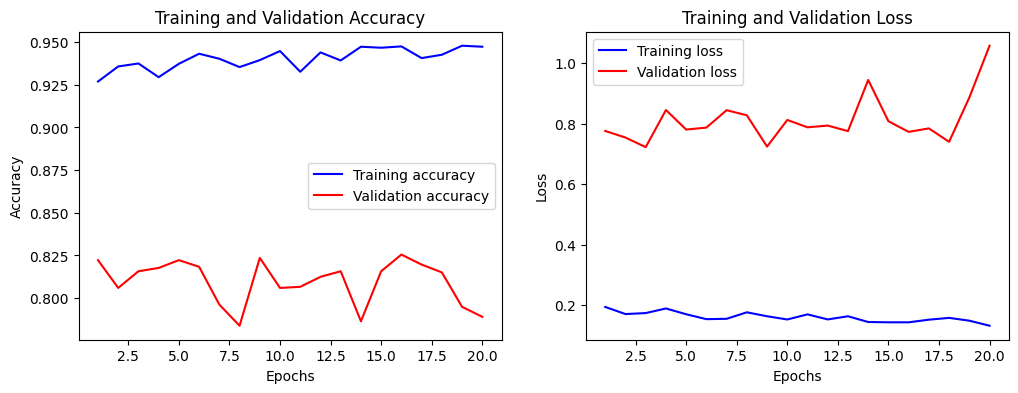

In [36]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Ambil data akurasi, loss, val_accuracy, dan val_loss dari objek history
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Tentukan jumlah epoch berdasarkan panjang history
    epochs = range(1, len(acc) + 1)

    # Plot Akurasi
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Tampilkan grafik
    plt.show()

plot_metrics(history)

# Contoh penggunaan:
# Gantilah 'history' dengan objek history dari pelatihan model Anda
# Sebagai contoh, jika Anda melatih model dengan Keras, objek history dapat diperoleh dengan model.fit(...)
# plot_metrics(history)

In [ ]:
pip install tensorflowjs

In [ ]:
import tensorflowjs

In [ ]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

In [ ]:
saved_model_path = "./{}.h5".format(int(time.time()))

history.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import os
import random

# Load your saved model
# model_path = 'path/to/your/saved_model'
loaded_model =  model #tf.keras.models.load_model(model_path)

# Specify the directory containing your test images
# test_directory = '/content/train/Heart'
# test_directory = '/content/test/Round'
test_directory = '/content/test/Square'

# Get a list of image files in the test directory
image_files = [f for f in os.listdir(test_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 10 samples
random_10_samples = random.sample(image_files, 10)

# Class labels corresponding to Heart, Round, Square
class_labels = ['Heart', 'Round', 'Square']

# Iterate over the 10 randomly selected image files and make predictions
for img_file in random_10_samples:
    img_path = os.path.join(test_directory, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = loaded_model.predict(img_array)

    # Get the predicted class index (0, 1, or 2)
    predicted_class_index = np.argmax(predictions)

    # Get the corresponding class label
    predicted_class_label = class_labels[predicted_class_index]

    # Print the prediction result
    print(f"\nPredicted face shape for {img_file}: {predicted_class_label}")


1/1 [==============================] - 0s 26ms/step

Predicted face shape for Square__0_6165.jpg: Round
1/1 [==============================] - 0s 25ms/step

Predicted face shape for Square__0_3925.jpg: Heart
1/1 [==============================] - 0s 47ms/step

Predicted face shape for Square__0_6348.jpg: Round
1/1 [==============================] - 0s 101ms/step

Predicted face shape for Square__0_9358.jpg: Round
1/1 [==============================] - 0s 26ms/step

Predicted face shape for Square__0_559.jpg: Round
1/1 [==============================] - 0s 32ms/step

Predicted face shape for Square__0_8999.jpg: Heart
1/1 [==============================] - 0s 25ms/step

Predicted face shape for Square__0_9538.jpg: Heart
1/1 [==============================] - 0s 25ms/step

Predicted face shape for Square__0_2318.jpg: Round
1/1 [==============================] - 0s 24ms/step

Predicted face shape for Square__0_6224.jpg: Heart
1/1 [==============================] - 0s 24ms/step

Predicted f

In [ ]:
import os

def count_files_in_directory(directory_path):
    # Get the list of files in the directory
    files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

    # Count the number of files
    num_files = len(files)

    return num_files

# Specify the directory path
directory_path = '/content/test/Heart'

# Call the function to count files
num_files = count_files_in_directory(directory_path)

# Print the result
print(f"Number of files in the directory: {num_files}")


Number of files in the directory: 588


In [ ]:
!zip /content/model.zip -r /content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5

  adding: content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5/ (stored 0%)
  adding: content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5/variables/ (stored 0%)
  adding: content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5/variables/variables.index (deflated 65%)
  adding: content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5/assets/ (stored 0%)
  adding: content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5/saved_model.pb (deflated 87%)
  adding: content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5/fingerprint.pb (stored 0%)
  adding: content/drive/MyDrive/style-mate/saved_model_Dec_16_2023_v5/keras_metadata.pb (deflated 92%)


In [ ]:
!cp /content/model.zip /content/drive/MyDrive/style-mate/